Using TensorFlow backend.


Train on 18709 samples, validate on 6237 samples
Epoch 1/10
18709/18709 [==============================] - 149s 8ms/step - loss: 0.6945 - acc: 0.4944 - val_loss: 0.6955 - val_acc: 0.4991
Epoch 2/10
18709/18709 [==============================] - 135s 7ms/step - loss: 0.6943 - acc: 0.4965 - val_loss: 0.6951 - val_acc: 0.5009
Epoch 3/10
18709/18709 [==============================] - 141s 8ms/step - loss: 0.6940 - acc: 0.5044 - val_loss: 0.6945 - val_acc: 0.5009
Epoch 4/10
18709/18709 [==============================] - 143s 8ms/step - loss: 0.6940 - acc: 0.4991 - val_loss: 0.6932 - val_acc: 0.5009
Epoch 5/10
18709/18709 [==============================] - 143s 8ms/step - loss: 0.6940 - acc: 0.5002 - val_loss: 0.6949 - val_acc: 0.4991
Epoch 6/10
18709/18709 [==============================] - 138s 7ms/step - loss: 0.6941 - acc: 0.4967 - val_loss: 0.6932 - val_acc: 0.5009
Epoch 7/10
18709/18709 [==============================] - 141s 8ms/step - loss: 0.6940 - acc: 0.5029 - val_loss: 0.6932 - v

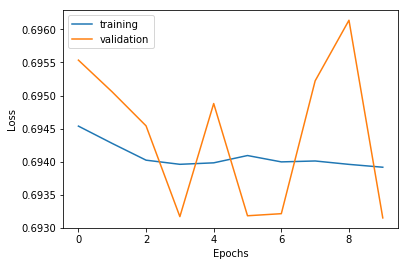

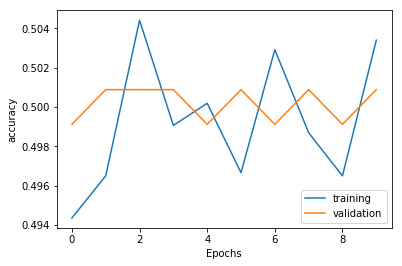

0.6931531359527439
0.5008818342772856


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import time

DATADIR = "C:/Users/Muhammad Zubair Khan/Downloads/Compressed/kagglecatsanddogs_3367a/PetImages"
CATEGORIES = ["Dog", "Cat"]

img_size = 50
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_img = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_img, class_num])
            except Exception as e:
                pass
            
            
create_training_data()

from keras import backend as k
import random
random.shuffle(training_data)

x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)
            
from keras.utils import np_utils
x = np.array(x).reshape(-1, img_size, img_size, 1)
x = x/255.0
#y=np_utils.to_categorical(y, 2) 
      
         
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y)

from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout, Activation
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import matplotlib.pyplot as plt
%matplotlib inline
epochs = 10
batch_size = 64
filter_size = 3
pool_size = 2
num_filters = 32

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)


model = Sequential()
model.add(Conv2D(num_filters, (filter_size, filter_size), padding='valid', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(num_filters, (filter_size, filter_size), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=1)

def plot_history(value):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel("Loss")
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['training', 'validation'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel("accuracy")
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.legend(['training', 'validation'])
    plt.show()
    
plot_history(history)
loss, accuracy =model.evaluate(x_val, y_val, verbose=0)
print(loss)
print(accuracy)


